# Imports and Functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop = stopwords.words('english')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [ ]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text)
    text = re.sub('US','usa', text)
    text = str(text).lower()
    text = re.sub('rt\s@[\w\d_]+', ' ', text)
    text = re.sub('mt\s@[\w\d_]+', ' ', text)
    text = re.sub('@[_\d\w]+',' ', text)
    text = re.sub('&quot', ' ', text)
    text = re.sub('&amp', ' ', text)
    text = re.sub('&lt', ' ', text)
    text = re.sub('&gt', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'www\S+', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[^A-Za-z0-9@_\s#%]+', ' ', text)
    text = re.sub('\s[\d,\s]+\s', ' ', text)
    text = re.sub('\s[\d\w]\s', ' ', text)
    return text

def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(row):
    return [lemmatizer.lemmatize(w) for w in row]

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

# Read in Data

In [ ]:
#ows = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ows-raw.csv', on_bad_lines='skip')
ows = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ows-attributes.csv', on_bad_lines='skip')
ows.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Twitter ID,Text,Profile Image URL,Day,Hour,Minute,Created At,Geo,From User,...,Source,clean_text,text_lemmatized,lemmatized_tokens,mentioned,hashtags,is_retweet,has_multimedia,has_mention,is_modifiedTweet
0,0,121813144174727168,RT @AnonKitsu: ALERT!!!!!!!!!!COPS ARE KETTLIN...,http://a2.twimg.com/profile_images/1539375713/...,2011-10-06,5,4,2011-10-06 05:04:51,N;,Anonops_Cop,...,&lt;a href=&quot;http://twitter.com/&quot;&gt;...,alert cops are kettling protesters in park he...,"['alert', 'cops', 'are', 'kettling', 'proteste...","['alert', 'cops', 'kettling', 'protester', 'pa...",[],"['#occupywallstreet', '#ows', '#occupyny']",True,False,False,False
1,1,121813146137657344,@jamiekilstein @allisonkilkenny Interesting in...,http://a2.twimg.com/profile_images/1574715503/...,2011-10-06,5,4,2011-10-06 05:04:51,N;,KittyHybrid,...,&lt;a href=&quot;http://twitter.com/&quot;&gt;...,interesting interview never aired wonder wh...,"['interesting', 'interview', 'never', 'aired',...","['interesting', 'interview', 'never', 'aired',...","['@jamiekilstein', '@allisonkilkenny']",['#ows'],False,True,True,False
2,2,121813150000619521,@Seductivpancake Right! Those guys have a vict...,http://a1.twimg.com/profile_images/1241412831/...,2011-10-06,5,4,2011-10-06 05:04:52,N;,nerdsherpa,...,&lt;a href=&quot;http://www.echofon.com/&quot;...,right those guys have victory condition re...,"['right', 'those', 'guys', 'have', 'victory', ...","['right', 'guys', 'victory', 'condition', 'reg...",['@Seductivpancake'],['#ows'],False,False,True,False
3,3,121813150701072385,RT @bembel &quot;Occupy Wall Street&quot; als ...,http://a0.twimg.com/profile_images/1106399092/...,2011-10-06,5,4,2011-10-06 05:04:52,N;,hamudistan,...,&lt;a href=&quot;http://levelupstudio.com&quot...,occupy wall street als linke antwort auf die ...,"['occupy', 'wall', 'street', 'als', 'linke', '...","['occupy', 'wall', 'street', 'als', 'linke', '...",[],"['#occupywallstreet', '#ows']",True,True,False,False
4,4,121813163778899968,#ows White shirt= Brown shirt.,http://a2.twimg.com/profile_images/1568117871/...,2011-10-06,5,4,2011-10-06 05:04:56,N;,kl_knox,...,&lt;a href=&quot;http://twitter.com/&quot;&gt;...,#ows white shirt brown shirt,"['#ows', 'white', 'shirt', 'brown', 'shirt']","['#ows', 'white', 'shirt', 'brown', 'shirt']",[],['#ows'],False,False,False,False


In [ ]:
ows['Text'] = ows['Text'].astype('str') 
ows['Profile Image URL'] = ows['Profile Image URL'].astype('str') 
ows['Day'] = ows['Day'].astype('str') 
ows['Created At'] = ows['Created At'].astype('str') 
ows['Geo'] = ows['Geo'].astype('str') 
ows['From User'] = ows['From User'].astype('str') 
ows['Language'] = ows['Language'].astype('str') 
ows['To User'] = ows['To User'].astype('str') 
ows['Source'] = ows['Source'].astype('str') 

In [ ]:
ows.to_hdf('ows-attributes.h5', key='ows')  

In [ ]:
ows.shape

(6602120, 22)

In [ ]:
ows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6602120 entries, 0 to 6602119
Data columns (total 22 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Twitter ID          int64 
 2   Text                object
 3   Profile Image URL   object
 4   Day                 object
 5   Hour                int64 
 6   Minute              int64 
 7   Created At          object
 8   Geo                 object
 9   From User           object
 10  From User ID        int64 
 11  Language            object
 12  To User             object
 13  To User ID          int64 
 14  Source              object
 15  clean_text          object
 16  clean_no_stopwords  object
 17  tokenized_text      object
 18  is_retweet          bool  
 19  has_multimedia      object
 20  has_mention         bool  
 21  is_modifiedTweet    bool  
dtypes: bool(3), int64(6), object(13)
memory usage: 975.9+ MB


In [ ]:
ows.columns

In [ ]:
ows['Text'] = ows['Text'].astype('str') 

In [ ]:
ows.dtypes

Unnamed: 0             int64
Twitter ID             int64
Text                  object
Profile Image URL     object
Day                   object
Hour                   int64
Minute                 int64
Created At            object
Geo                   object
From User             object
From User ID           int64
Language              object
To User               object
To User ID             int64
Source                object
clean_text            object
clean_no_stopwords    object
tokenized_text        object
is_retweet              bool
has_multimedia        object
has_mention             bool
is_modifiedTweet        bool
dtype: object

In [ ]:
ows['date'] = pd.to_datetime(ows['Created At'])

In [ ]:
ows.to_csv('/content/drive/MyDrive/Colab Notebooks/ows-attributes.csv')
#ows.to_hdf('ows-attributes.h5', key='ows', mode='w')  
#ows.columns

# Preprocessing

In [ ]:
ows.head(20)

,Twitter ID,Text,Profile Image URL,Day,Hour,Minute,Created At,Geo,From User,From User ID,...,Source,clean_text,text_lemmatized,lemmatized_tokens,mentioned,hashtags,is_retweet,has_multimedia,has_mention,is_modifiedTweet
0,121813144174727168,RT @AnonKitsu: ALERT!!!!!!!!!!COPS ARE KETTLIN...,http://a2.twimg.com/profile_images/1539375713/...,2011-10-06,5,4,2011-10-06 05:04:51,N;,Anonops_Cop,401240477,...,&lt;a href=&quot;http://twitter.com/&quot;&gt;...,alert cops are kettling protesters in park he...,"[alert, cops, are, kettling, protester, in, pa...","[alert, cops, kettling, protester, park, helic...",[],"[#occupywallstreet, #ows, #occupyny]",True,False,False,False
1,121813146137657344,@jamiekilstein @allisonkilkenny Interesting in...,http://a2.twimg.com/profile_images/1574715503/...,2011-10-06,5,4,2011-10-06 05:04:51,N;,KittyHybrid,34532053,...,&lt;a href=&quot;http://twitter.com/&quot;&gt;...,interesting interview never aired wonder wh...,"[interesting, interview, never, aired, wonder,...","[interesting, interview, never, aired, wonder,...","[@jamiekilstein, @allisonkilkenny]",[#ows],False,True,False,False
2,121813150000619521,@Seductivpancake Right! Those guys have a vict...,http://a1.twimg.com/profile_images/1241412831/...,2011-10-06,5,4,2011-10-06 05:04:52,N;,nerdsherpa,95067344,...,&lt;a href=&quot;http://www.echofon.com/&quot;...,right those guys have victory condition re...,"[right, those, guys, have, victory, condition,...","[right, guys, victory, condition, regime, chan...",[@Seductivpancake],[#ows],False,False,False,False
3,121813150701072385,RT @bembel &quot;Occupy Wall Street&quot; als ...,http://a0.twimg.com/profile_images/1106399092/...,2011-10-06,5,4,2011-10-06 05:04:52,N;,hamudistan,35862923,...,&lt;a href=&quot;http://levelupstudio.com&quot...,occupy wall street als linke antwort auf die ...,"[occupy, wall, street, als, linke, antwort, au...","[occupy, wall, street, als, linke, antwort, au...",[],"[#occupywallstreet, #ows]",True,True,False,False
4,121813163778899968,#ows White shirt= Brown shirt.,http://a2.twimg.com/profile_images/1568117871/...,2011-10-06,5,4,2011-10-06 05:04:56,N;,kl_knox,419580636,...,&lt;a href=&quot;http://twitter.com/&quot;&gt;...,#ows white shirt brown shirt,"[#ows, white, shirt, brown, shirt]","[#ows, white, shirt, brown, shirt]",[],[#ows],False,False,False,False
5,121813169999065088,RT @TheNewDeal: The #NYPD are Out of Control. ...,http://a2.twimg.com/profile_images/1344925102/...,2011-10-06,5,4,2011-10-06 05:04:57,N;,vickycrampton,32151083,...,&lt;a href=&quot;http://twitter.com/&quot;&gt;...,the #nypd are out of control is this free co...,"[the, #nypd, are, out, of, control, is, this, ...","[#nypd, control, free, country, middle, east, ...",[],"[#nypd, #occupywallstreet, #ows, #p2]",True,False,False,False
6,121813190454689792,1912 prediction re: founding of #Fed : Then we...,http://a2.twimg.com/profile_images/1362909408/...,2011-10-06,5,5,2011-10-06 05:05:02,N;,burgerbuilders,143597105,...,&lt;a href=&quot;http://twitter.com/&quot;&gt;...,1912 prediction re founding of #fed then we s...,"[1912, prediction, re, founding, of, #fed, the...","[1912, prediction, founding, #fed, shall, corp...",[],"[#fed, #ows]",False,True,False,False
7,121813195924058113,Wall Street Protests Marred by Anti-Semitism h...,http://a2.twimg.com/profile_images/1497877873/...,2011-10-06,5,5,2011-10-06 05:05:03,N;,neverfox,363594381,...,&lt;a href=&quot;http://www.tweetdeck.com&quot...,wall street protests marred by anti semitism #ows,"[wall, street, protest, marred, by, anti, semi...","[wall, street, protest, marred, anti, semitism...",[],[#ows],False,True,False,False
8,121813197404639232,#OWS @cynthiaboaz 8 rules for Satyagrahi activ...,http://a3.twimg.com/profile_images/1508918940/...,2011-10-06,5,5,2011-10-06 05:05:04,N;,davidgaliel,19105658,...,&lt;a href=&quot;http://twitterrific.com&quot;...,#ows rules for satyagrahi activism gene sharp...,"[#ows, rule, for, satyagrahi, activism, gene, ...","[#ows, rule, s

## Tweet Attributes

In [ ]:
ows['mentioned'] = ows['Text'].apply(find_mentioned)
ows['hashtags'] = ows['clean_text'].apply(find_hashtags)

In [ ]:
ows['is_retweet'] = [True if re.search('RT\s@[\w\d_]+', str(x)) else False for x in ows['Text']]

In [ ]:
ows['has_multimedia'] = ows['Text'].str.contains('http://')

In [ ]:
ows['has_mention'] = [True if len(x)!=0 else False for x in ows['mentioned']]

In [ ]:
ows['is_modifiedTweet'] = [True if re.search('MT\s@[\w\d_]+', str(x)) else False for x in ows['Text']]

## Clean and Tokenize

In [ ]:
#1.03 s ± 41.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) for 10,000 entries
#Estimated 10 minutes to run
ows['clean_text'] = ows['Text'].apply(lambda x:clean_text(x))

In [ ]:
#1.53 s ± 65.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) for 10,000 entries
#Estimated 15 minutes to run
ows['text_lemmatized'] = ows['clean_text'].apply(lambda x: [''.join(lemmatizer.lemmatize(w)) if len(w) > 4 else ''.join(w) for w in str(x).split()])

In [ ]:
#1.17 s ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each) for 10,000 entries
#Estimated 12 minutes to run
ows['lemmatized_tokens'] = ows['text_lemmatized'].apply(lambda x: ' '.join([word for word in x if word not in (stop)]).split())
ows.head(10)

In [ ]:
top = Counter([item for sublist in ows['lemmatized_tokens'] for item in sublist])
temp = pd.DataFrame(top.most_common(100))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,#occupywallstreet,625722
2,occupy,595906
3,#occupy,537359
4,#p2,474172
5,police,462983
6,street,400477
7,wall,385592
8,people,369426
9,protester,360991
10,via,286568


In [ ]:
top25 = temp.head(25)

# EDA and Graphs

## Top words in Tweets

In [ ]:
top25.style.background_gradient(cmap='Blues')

,Common_words,count
1,#occupywallstreet,625722
2,occupy,595906
3,#occupy,537359
4,#p2,474172
5,police,462983
6,street,400477
7,wall,385592
8,people,369426
9,protester,360991
10,via,286568


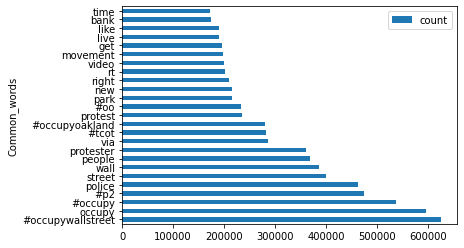

In [ ]:
ax = top25.plot.barh(x='Common_words', y='count', rot=0)

## Tweets Per Day

In [ ]:
tweets_per_day = ows.groupby(pd.Grouper(freq="D", key = 'date'))['Twitter ID'].count().reset_index()
tweets_per_day

,date,Twitter ID
0,2011-10-06,49638
1,2011-10-07,65238
2,2011-10-08,65949
3,2011-10-09,65097
4,2011-10-10,78619
...,...,...
131,2012-02-14,13580
132,2012-02-15,13248
133,2012-02-16,12837
134,2012-02-17,12468


(array([15248., 15262., 15279., 15293., 15309., 15323., 15340., 15354.,
        15371., 15385.]),
 [Text(15248.0, 0, '2011-10-01'),
  Text(15262.0, 0, '2011-10-15'),
  Text(15279.0, 0, '2011-11-01'),
  Text(15293.0, 0, '2011-11-15'),
  Text(15309.0, 0, '2011-12-01'),
  Text(15323.0, 0, '2011-12-15'),
  Text(15340.0, 0, '2012-01-01'),
  Text(15354.0, 0, '2012-01-15'),
  Text(15371.0, 0, '2012-02-01'),
  Text(15385.0, 0, '2012-02-15')])

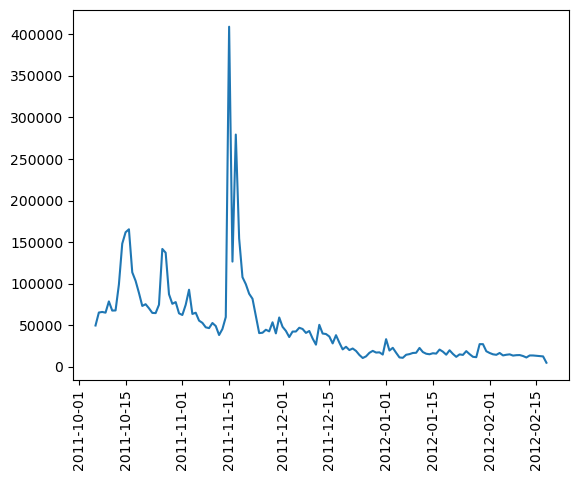

In [ ]:
f, ax = plt.subplots()
ax.plot(tweets_per_day['date'], tweets_per_day['Twitter ID'])
plt.xticks(rotation=90)

## Retweet Count

In [ ]:
retweet_count = ows['is_retweet'].value_counts().reset_index().rename(columns={"index": "value", "is_retweet": "count"})
retweet_count = retweet_count.replace({False: 'Original Tweet', True: 'Retweet'})
retweet_count

,value,count
0,Retweet,3838335
1,Original Tweet,2763785


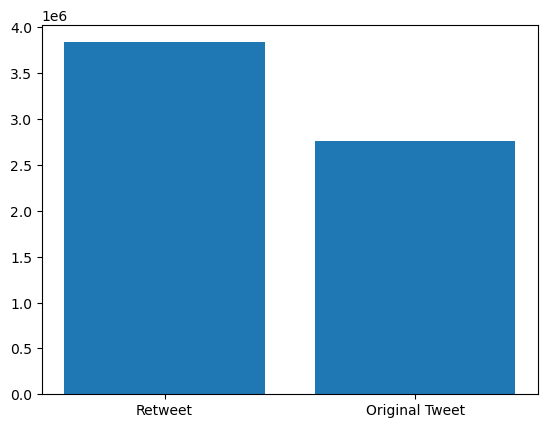

In [ ]:
fig1 = plt.figure("Figure 1")
plt.bar(retweet_count['value'], retweet_count['count'])
plt.show()

## Multimedia Count

In [ ]:
multimedia_count = ows['has_multimedia'].value_counts().reset_index().rename(columns={"index": "value", "has_multimedia": "count"})
multimedia_count = multimedia_count.replace({False: 'Text Only Tweet', True: 'Multimedia Tweet'})
multimedia_count

,value,count
0,Multimedia Tweet,3522587
1,Text Only Tweet,3079524


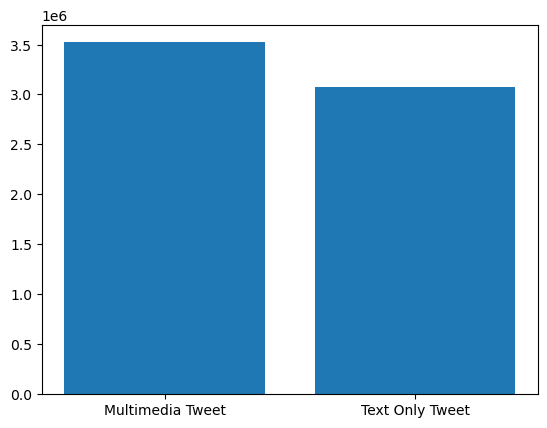

In [ ]:
fig2 = plt.figure("Figure 2")
plt.bar(multimedia_count['value'], multimedia_count['count'])
plt.show()

## Mention Count

In [ ]:
mention_count = ows['has_mention'].value_counts().reset_index().rename(columns={"index": "value", "has_mention": "count"})
mention_count = mention_count.replace({False: 'Does Not Mention Other User', True: 'Does Mention Other User'})
mention_count

,value,count
0,Does Not Mention Other User,4789678
1,Does Mention Other User,1812442


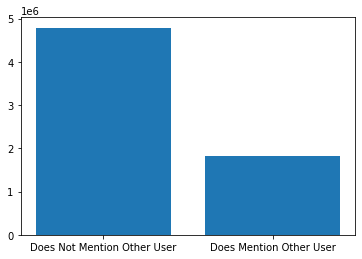

In [ ]:
fig2 = plt.figure("Figure 3")
plt.bar(mention_count['value'], mention_count['count'])
plt.show()

## Modified Tweet Count

In [ ]:
modtweet_count = ows['is_modifiedTweet'].value_counts().reset_index().rename(columns={"index": "value", "is_modifiedTweet": "count"})
modtweet_count = modtweet_count.replace({False: 'Not Modified Tweet', True: 'Modified Tweet'})
modtweet_count

,value,count
0,Not Modified Tweet,6544160
1,Modified Tweet,57960


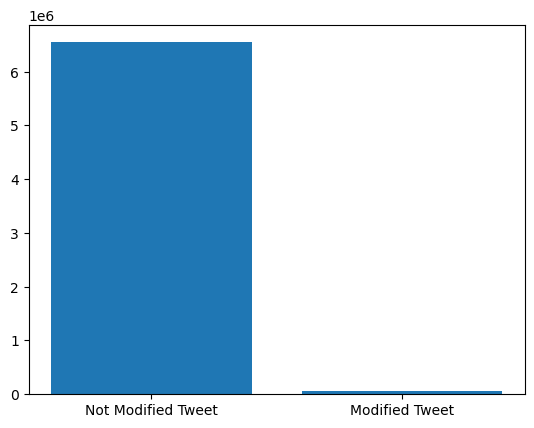

In [ ]:
fig1 = plt.figure("Figure 4")
plt.bar(modtweet_count['value'], modtweet_count['count'])
plt.show()

## Most Retweeted Tweets

In [ ]:
ows.groupby(['Text']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(50)

,Text,counts
2145625,RT @GZornick: NYC authorities clearly feel #OW...,4245
2982739,RT @wikileaks: █████ ████ everything ███ █████...,4203
2251243,RT @MarthaPlimpton: If Fred Phelps has the rig...,3673
2026426,RT @AnonymousWiki: The world needs to know tha...,3399
2486131,RT @SweetOnPeacexx: #OWS and #OccupyWallStreet...,2989
2988021,RT @xenijardin: #OWS Fact: More people have no...,2988
2526315,"RT @USGeneralStrike: In America, if you camp o...",2215
2463792,RT @SenatorSanders: Bank of America received a...,2147
2463886,RT @SenatorSanders: Exxon made $19 billion in ...,2120
2677872,RT @estellevw: “If only they enforced bank reg...,2092
